<b>previous_application.csv</b>
    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.

<a id="top"></a>
- [Overview](#overview)
- [SK_ID_PREV](#sk-id-prev)
- [SK_ID_CURR](#sk-id-curr)
- [NAME_CONTRACT_TYPE](#name-contract-type)
- [AMT_ANNUITY](#amt-annuity)
- [AMT_APPLICATION](#amt-application)
- [AMT_CREDIT](#amt-credit)
- [AMT_DOWN_PAYMENT](#amt-down-payment)
- [AMT_GOODS_PRICE](#amt-goods-price)
- [WEEKDAY_APPR_PROCESS_START](#weekday-appr-process-start)
- [HOUR_APPR_PROCESS_START](#hour-appr-process-start)
- [FLAG_LAST_APPL_PER_CONTRACT](#flag-last-appl-per-contract)
- [NFLAG_LAST_APPL_IN_DAY](#nflag-last-appl-in-dayt)
- [RATE_DOWN_PAYMENT](#rate-down-payment)
- [RATE_INTEREST_PRIMARY](#rate-interest-primary)
- [RATE_INTEREST_PRIVILEGED](#rate-interest-privileged)
- [NAME_CASH_LOAN_PURPOSE ](#name-cash-loadn-purpose)
- [NAME_CONTRACT_STATUS](#name-contract-status)
- [DAYS_DECISION](#days-decision)
- [NAME_PAYMENT_TYPE](#name-payment-type)
- [CODE_REJECT_REASON](#code-reject-reason)
- [NAME_TYPE_SUITE](#name-type-suite)
- [NAME_CLIENT_TYPE](#name-client-type)
- [NAME_GOODS_CATEGORY](#name-goods-category)
- [NAME_PORTFOLIO](#name-portfolio)
- [NAME_PRODUCT_TYPE](#name-product-type)
- [CHANNEL_TYPE](#channel-type)
- [SELLERPLACE_AREA](#sellerplace-area)
- [NAME_SELLER_INDUSTRY](#name-seller-industry)
- [CNT_PAYMENT](#cnt-payment)
- [NAME_YIELD_GROUP](#name-yield-group)
- [PRODUCT_COMBINATION](#product-combination)
- [DAYS_FIRST_DRAWING](#days-first-drawing)
- [DAYS_FIRST_DUE](#days-first-due)
- [DAYS_LAST_DUE_1ST_VERSION](#days-last-due-1st-version)
- [DAYS_LAST_DUE](#days-last-due)
- [DAYS_TERMINATION](#days-termination)
- [NFLAG_INSURED_ON_APPROVAL](#nflag-insured-on-approval)

## Prepare

In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999

prv = feather.read_dataframe('../data/input/previous_application.feather')
app_trn = feather.read_dataframe('../data/input/application_train.feather')
prv = prv.merge(app_trn[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner')

In [2]:
def target_bar(df, col, title=None):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    t0 = df0[col].value_counts().rename(col + '0')
    t1 = df1[col].value_counts().rename(col + '1')
    t = pd.concat([t0, t1], axis=1).fillna(0).astype(int)
    t['total'] = t.sum(axis=1)
    t.sort_values('total', inplace=True, ascending=False)
    t.drop(columns=['total'], inplace=True)

    idx = np.arange(len(t))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    p1 = ax.bar(idx, t[col + '0'], width)
    p2 = ax.bar(idx+width, t[col + '1'], width)
    ax.legend((p1[0], p2[0]), ('Target=0', 'Target=1'))
    ax.set_title(title)
    ax.set_xticks(idx + width / 2)
    ax.set_xticklabels(t.index.values, rotation=45)

    plt.show()
    
def target_hist(df, col, title):

    df0 = df[df["TARGET"] == 0]
    df1 = df[df["TARGET"] == 1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(df0[col].dropna(), ax=axes[0], color='b')
    axes[0].set_title('Target=0')
    sns.distplot(df1[col].dropna(), ax=axes[1], color='orange')
    axes[1].set_title('Target=1')
    fig.suptitle(title)
    plt.show()

<a id="overview"></a>
## Overview

In [3]:
prv.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,0


In [4]:
prv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 38 columns):
SK_ID_PREV                     1413701 non-null int64
SK_ID_CURR                     1413701 non-null int64
NAME_CONTRACT_TYPE             1413701 non-null object
AMT_ANNUITY                    1106483 non-null float64
AMT_APPLICATION                1413701 non-null float64
AMT_CREDIT                     1413700 non-null float64
AMT_DOWN_PAYMENT               664161 non-null float64
AMT_GOODS_PRICE                1094176 non-null float64
WEEKDAY_APPR_PROCESS_START     1413701 non-null object
HOUR_APPR_PROCESS_START        1413701 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1413701 non-null object
NFLAG_LAST_APPL_IN_DAY         1413701 non-null int64
RATE_DOWN_PAYMENT              664161 non-null float64
RATE_INTEREST_PRIMARY          4791 non-null float64
RATE_INTEREST_PRIVILEGED       4791 non-null float64
NAME_CASH_LOAN_PURPOSE         1413701 non-null object
NAME_CONTRA

<a id="sk-id-prev"></a>
## SK_ID_PREV
decription : ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

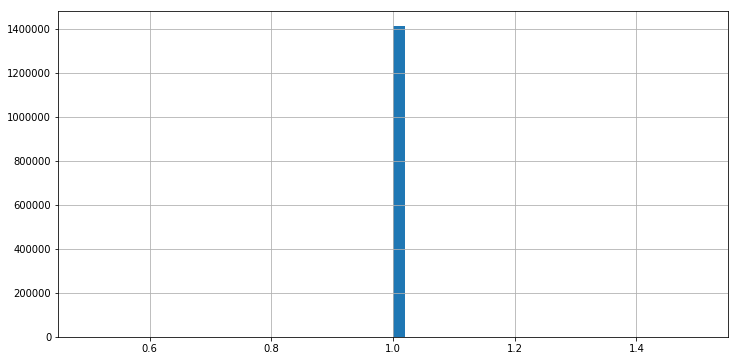

In [5]:
prv.SK_ID_PREV. value_counts().hist(bins=50, figsize=(12, 6))
plt.show()

全部1

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sk-id-curr"></a>
## SK_ID_CURR
decription : ID of loan in our sample

count    291057.000000
mean          4.857128
std           4.147042
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          73.000000
Name: SK_ID_CURR, dtype: float64


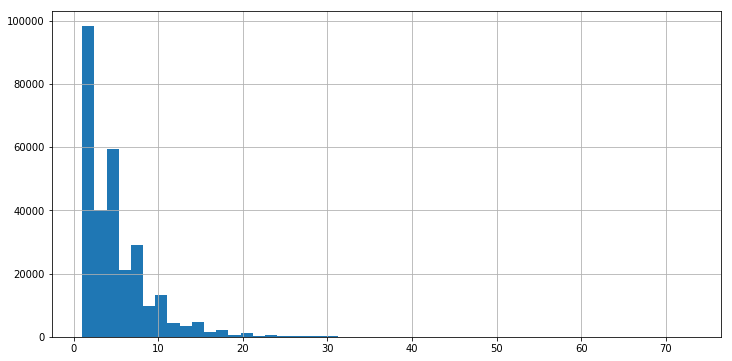

In [6]:
print(prv.SK_ID_CURR. value_counts().describe())
prv.SK_ID_CURR. value_counts().hist(bins=50, figsize=(12, 6))
plt.show()

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-contract-type"></a>
## NAME_CONTRACT_TYPE

decription : Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

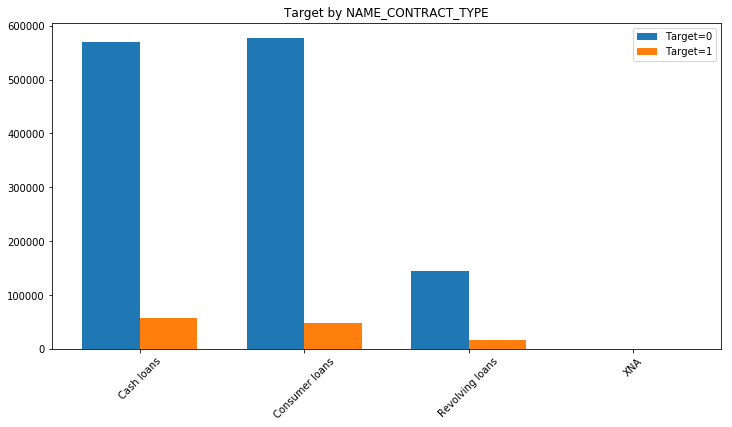

In [7]:
target_bar(prv[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'TARGET']], "NAME_CONTRACT_TYPE", "Target by NAME_CONTRACT_TYPE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-annuity"></a>
## AMT_ANNUITY

decription : Annuity of previous application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


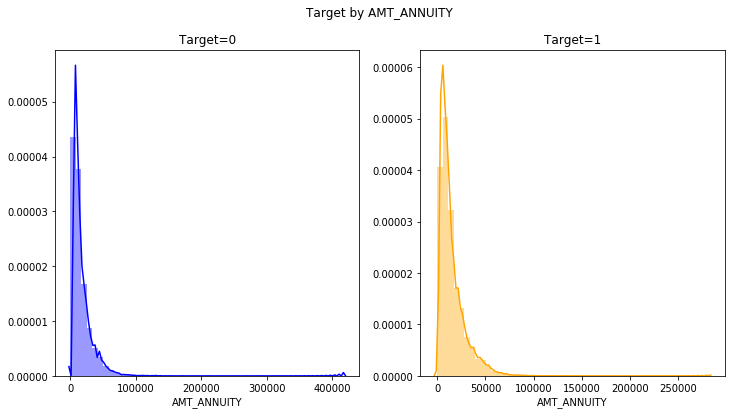

In [8]:
target_hist(prv[['SK_ID_CURR', 'AMT_ANNUITY', 'TARGET']], "AMT_ANNUITY", "Target by AMT_ANNUITY")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-application"></a>
## AMT_APPLICATION

decription : For how much credit did client ask on the previous application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


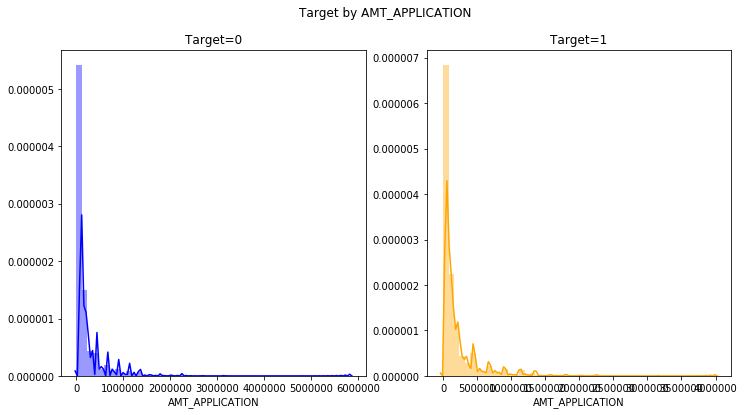

In [9]:
target_hist(prv[['SK_ID_CURR', 'AMT_APPLICATION', 'TARGET']], "AMT_APPLICATION", "Target by AMT_APPLICATION")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-credit"></a>
## AMT_CREDIT

AMT_APPLICATIONは申込み額、AMT_CREDITは承認されたクレジット額
-> 差額がHome Creditにおける信用度合いとしても良いのでは

decription : Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


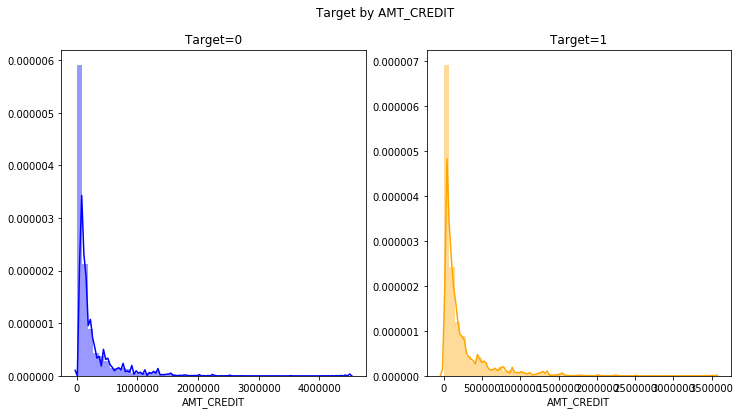

In [10]:
target_hist(prv[['SK_ID_CURR', 'AMT_CREDIT', 'TARGET']], "AMT_CREDIT", "Target by AMT_CREDIT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="amt-down-payment"></a>
## AMT_DOWN_PAYMENT

down payment = 頭金

decription : Down payment on the previous application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


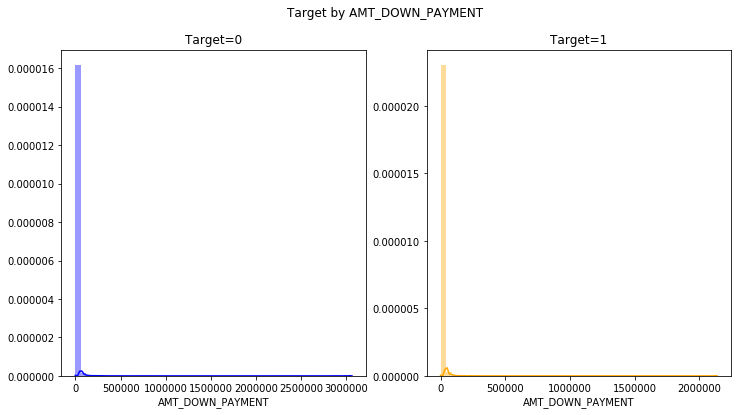

In [11]:
target_hist(prv[['SK_ID_CURR', 'AMT_DOWN_PAYMENT', 'TARGET']], "AMT_DOWN_PAYMENT", "Target by AMT_DOWN_PAYMENT")

<a id="amt-goods-price"></a>
## AMT_GOODS_PRICE


decription : Goods price of good that client asked for (if applicable) on the previous application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


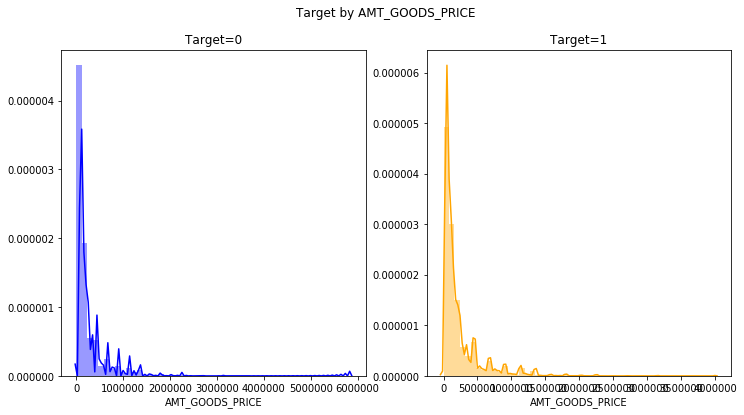

In [12]:
target_hist(prv[['SK_ID_CURR', 'AMT_GOODS_PRICE', 'TARGET']], "AMT_GOODS_PRICE", "Target by AMT_GOODS_PRICE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="weekday-appr-process-start"></a>
## WEEKDAY_APPR_PROCESS_START


decription : On which day of the week did the client apply for previous application

In [13]:
prv.WEEKDAY_APPR_PROCESS_START.value_counts()

WEDNESDAY    215519
TUESDAY      215058
MONDAY       214509
FRIDAY       213373
THURSDAY     211005
SATURDAY     204159
SUNDAY       140078
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

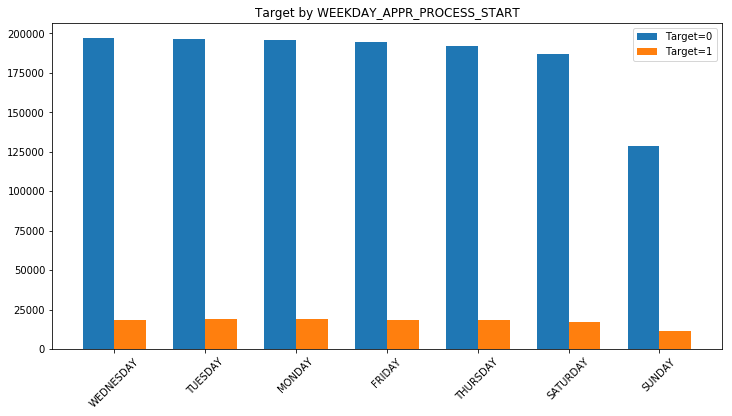

In [14]:
target_bar(prv[['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'TARGET']], "WEEKDAY_APPR_PROCESS_START", "Target by WEEKDAY_APPR_PROCESS_START")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="hour-appr-process-start"></a>
## HOUR_APPR_PROCESS_START


decription : Approximately at what day hour did the client apply for the previous application

In [15]:
prv.HOUR_APPR_PROCESS_START.value_counts()

11    163264
12    157528
10    153800
13    145838
14    133621
15    120895
9     107696
16    102526
17     80267
8      62317
18     53948
7      38846
19     28726
6      21705
5      12996
20     12260
4       7861
3       4182
21      3422
2        950
22       618
1        180
23       163
0         92
Name: HOUR_APPR_PROCESS_START, dtype: int64

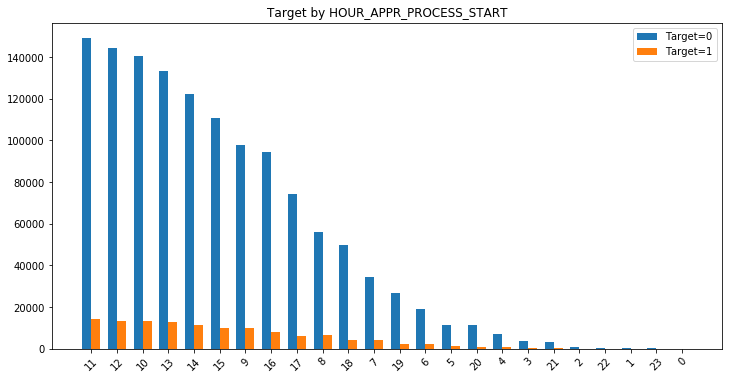

In [16]:
target_bar(prv[['SK_ID_CURR', 'HOUR_APPR_PROCESS_START', 'TARGET']], "HOUR_APPR_PROCESS_START", "Target by HOUR_APPR_PROCESS_START")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="flag-last-appl-per-contract"></a>
## FLAG_LAST_APPL_PER_CONTRACT


decription : Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract

In [17]:
prv['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1406387
N       7314
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

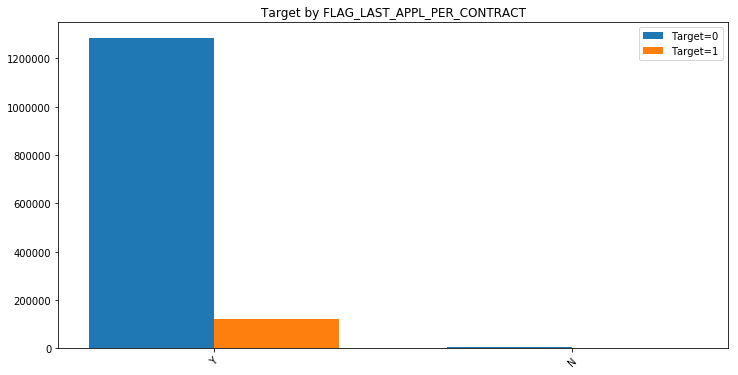

In [18]:
target_bar(prv[['SK_ID_CURR', 'FLAG_LAST_APPL_PER_CONTRACT', 'TARGET']], "FLAG_LAST_APPL_PER_CONTRACT", "Target by FLAG_LAST_APPL_PER_CONTRACT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="nflag-last-appl-in-day"></a>
## NFLAG_LAST_APPL_IN_DAY

複数回の申込みがシステム上エラーになるのでそのフラグ

decription : Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice

In [19]:
prv['NFLAG_LAST_APPL_IN_DAY'].value_counts()

1    1408657
0       5044
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

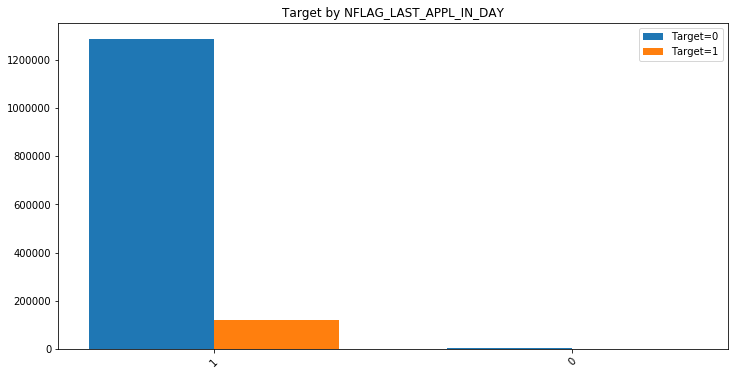

In [20]:
target_bar(prv[['SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY', 'TARGET']], "NFLAG_LAST_APPL_IN_DAY", "Target by NFLAG_LAST_APPL_IN_DAY")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="rate-down-payment"></a>
## RATE_DOWN_PAYMENT

RATE_DOWN_PAYMENT = 頭金の割合

decription : Down payment rate normalized on previous credit

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


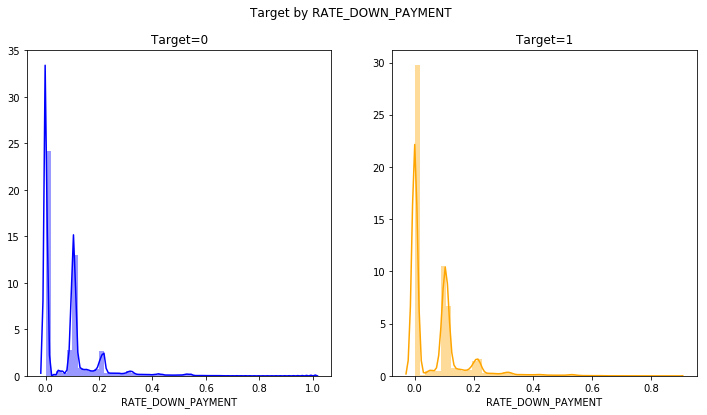

In [21]:
target_hist(prv[['SK_ID_CURR', 'RATE_DOWN_PAYMENT', 'TARGET']], "RATE_DOWN_PAYMENT", "Target by RATE_DOWN_PAYMENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="rate-interest-primary"></a>
## RATE_INTEREST_PRIMARY

interest = 利息、利子

decription : Interest rate normalized on previous credit

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


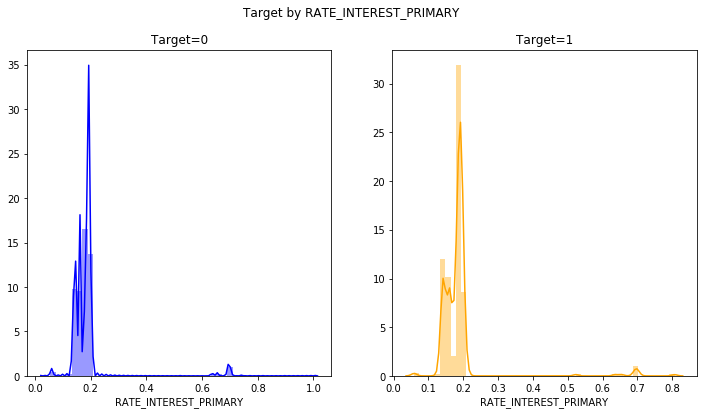

In [22]:
target_hist(prv[['SK_ID_CURR', 'RATE_INTEREST_PRIMARY', 'TARGET']], "RATE_INTEREST_PRIMARY", "Target by RATE_INTEREST_PRIMARY")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="rate-interest-privileged"></a>
## RATE_INTEREST_PRIVILEGED

interest = 利息、利子, privileged = 特権、特典、特別サービス？

decription : Interest rate normalized on previous credit

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


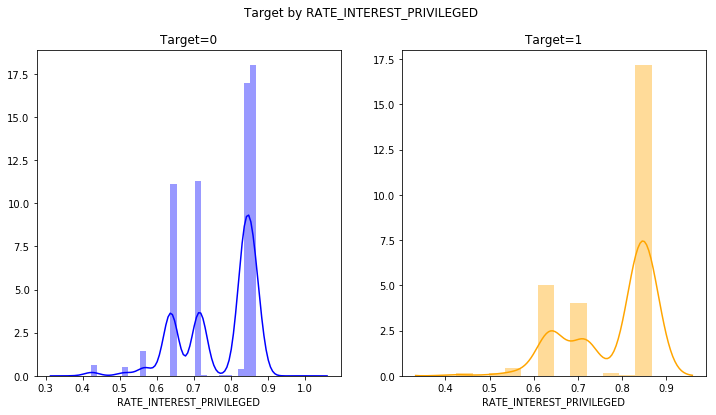

In [23]:
target_hist(prv[['SK_ID_CURR', 'RATE_INTEREST_PRIVILEGED', 'TARGET']], "RATE_INTEREST_PRIVILEGED", "Target by RATE_INTEREST_PRIVILEGED")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-cash-loan-purpose"></a>
## NAME_CASH_LOAN_PURPOSE

decription : Purpose of the cash loan

In [24]:
prv['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

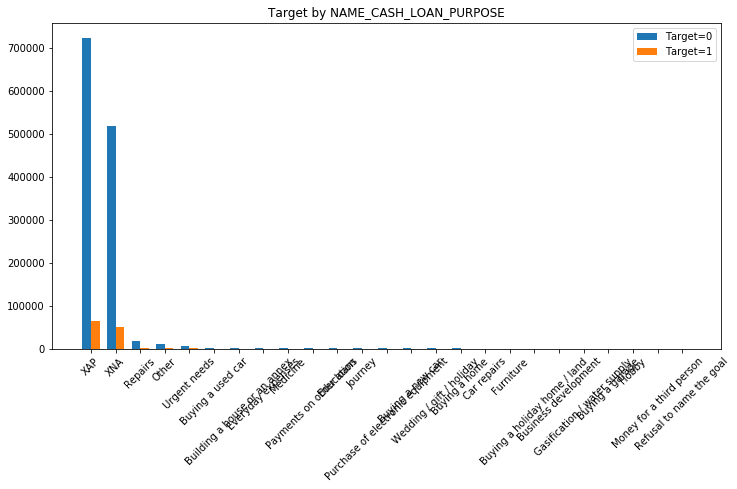

In [25]:
target_bar(prv[['SK_ID_CURR', 'NAME_CASH_LOAN_PURPOSE', 'TARGET']], "NAME_CASH_LOAN_PURPOSE", "Target by NAME_CASH_LOAN_PURPOSE")

XAPとXNAの違いをちゃんと調べたい

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-contract-status"></a>
## NAME_CONTRACT_STATUS

decription : Contract status (approved, cancelled, ...) of previous application

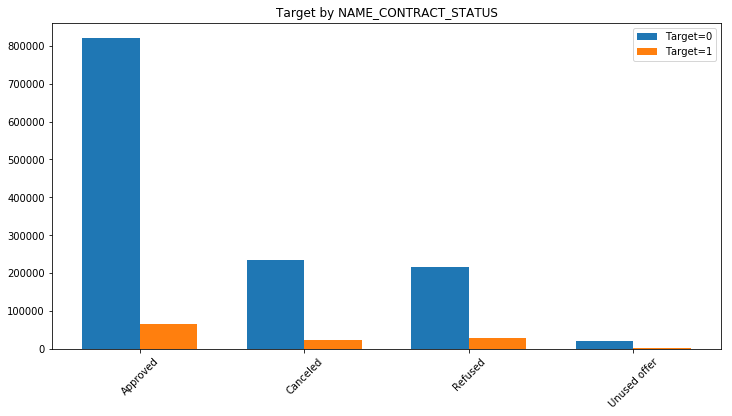

In [26]:
target_bar(prv[['SK_ID_CURR', 'NAME_CONTRACT_STATUS', 'TARGET']], "NAME_CONTRACT_STATUS", "Target by NAME_CONTRACT_STATUS")

やっぱ一回Refusedされた経験がある場合は1になりやすい？？

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-decision"></a>
## DAYS_DECISION 

判定が決まったのが現在のSK_ID_CURRからみて何日前か

decription : Relative to current application when was the decision about previous application made

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


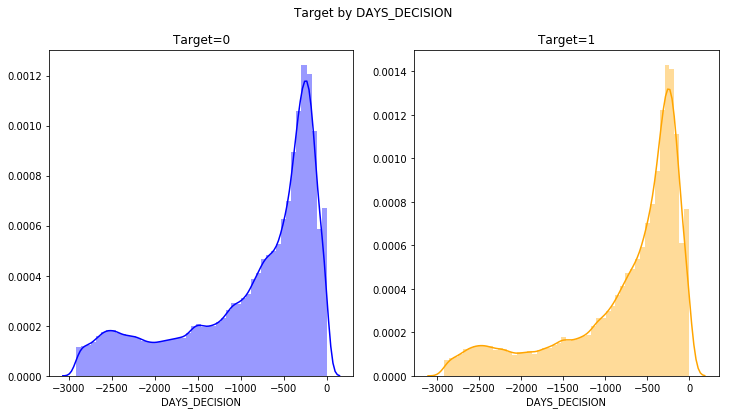

In [27]:
target_hist(prv[['SK_ID_CURR', 'DAYS_DECISION', 'TARGET']], "DAYS_DECISION", "Target by DAYS_DECISION")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-payment-type"></a>
## NAME_PAYMENT_TYPE 

decription : Payment method that client chose to pay for the previous application

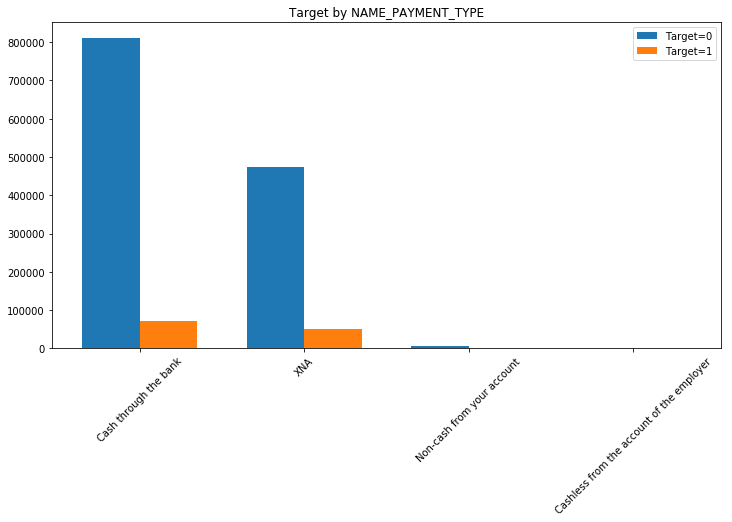

In [28]:
target_bar(prv[['SK_ID_CURR', 'NAME_PAYMENT_TYPE', 'TARGET']], "NAME_PAYMENT_TYPE", "Target by NAME_PAYMENT_TYPE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="code-reject-reason"></a>
## CODE_REJECT_REASON 

decription : Why was the previous application rejected

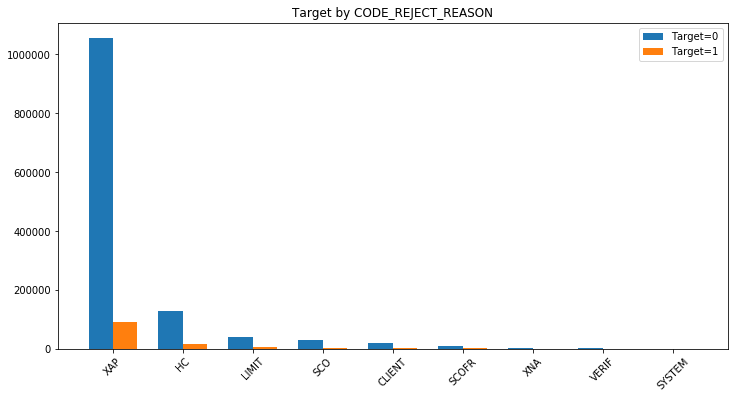

In [29]:
target_bar(prv[['SK_ID_CURR', 'CODE_REJECT_REASON', 'TARGET']], "CODE_REJECT_REASON", "Target by CODE_REJECT_REASON")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-type-suite"></a>
## NAME_TYPE_SUITE 

decription : Who accompanied client when applying for the previous application

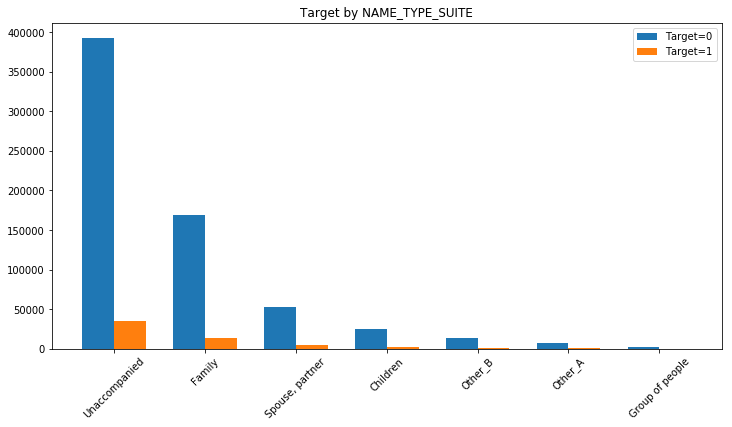

In [30]:
target_bar(prv[['SK_ID_CURR', 'NAME_TYPE_SUITE', 'TARGET']], "NAME_TYPE_SUITE", "Target by NAME_TYPE_SUITE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-client-type"></a>
## NAME_CLIENT_TYPE 

decription : Was the client old or new client when applying for the previous application

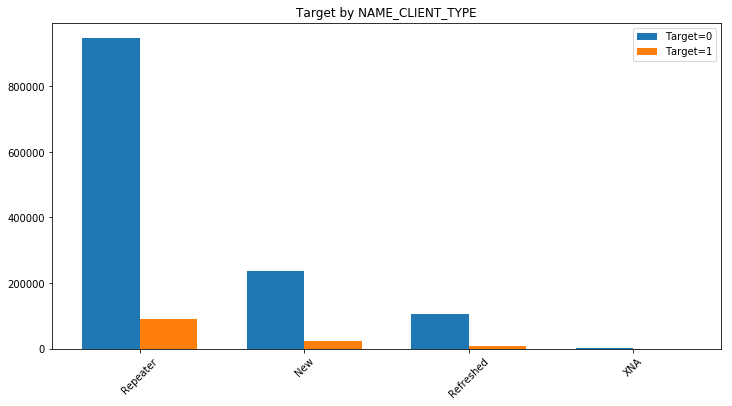

In [31]:
target_bar(prv[['SK_ID_CURR', 'NAME_CLIENT_TYPE', 'TARGET']], "NAME_CLIENT_TYPE", "Target by NAME_CLIENT_TYPE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-goods-category"></a>
## NAME_GOODS_CATEGORY 

decription : What kind of goods did the client apply for in the previous application

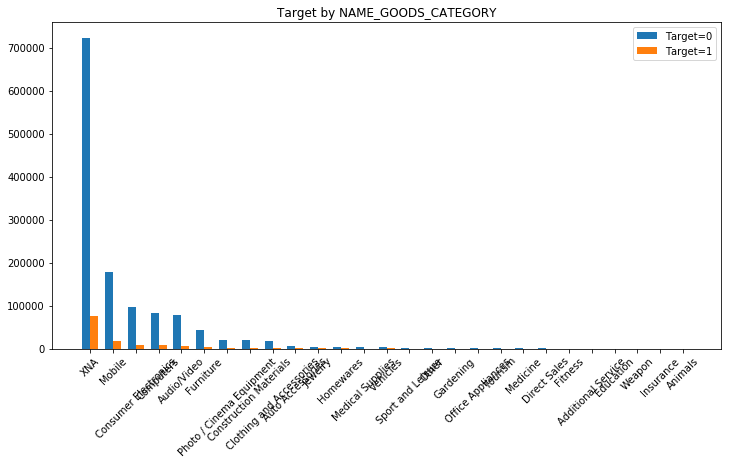

In [32]:
target_bar(prv[['SK_ID_CURR', 'NAME_GOODS_CATEGORY', 'TARGET']], "NAME_GOODS_CATEGORY", "Target by NAME_GOODS_CATEGORY")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-portfolio"></a>
## NAME_PORTFOLIO 

decription : Was the previous application for CASH, POS, CAR, ?,

In [33]:
prv['NAME_PORTFOLIO'].value_counts()

POS      592460
Cash     391663
XNA      307213
Cards    121985
Cars        380
Name: NAME_PORTFOLIO, dtype: int64

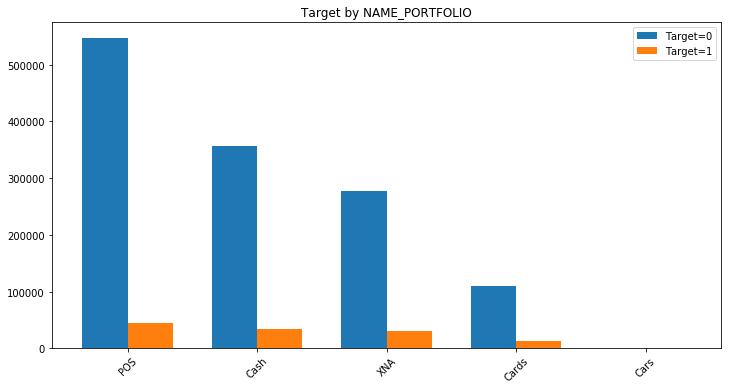

In [34]:
target_bar(prv[['SK_ID_CURR', 'NAME_PORTFOLIO', 'TARGET']], "NAME_PORTFOLIO", "Target by NAME_PORTFOLIO")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-product-type"></a>
## NAME_PRODUCT_TYPE 

decription : Was the previous application x-sell o walk-in

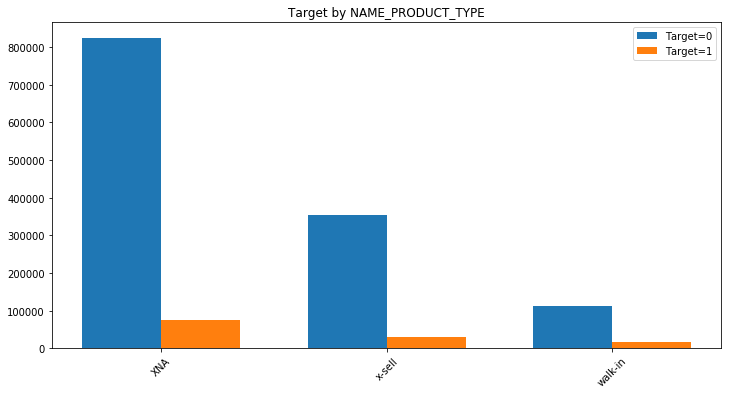

In [35]:
target_bar(prv[['SK_ID_CURR', 'NAME_PRODUCT_TYPE', 'TARGET']], "NAME_PRODUCT_TYPE", "Target by NAME_PRODUCT_TYPE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="channel-type"></a>
## CHANNEL_TYPE 

decription : Through which channel we acquired the client on the previous application

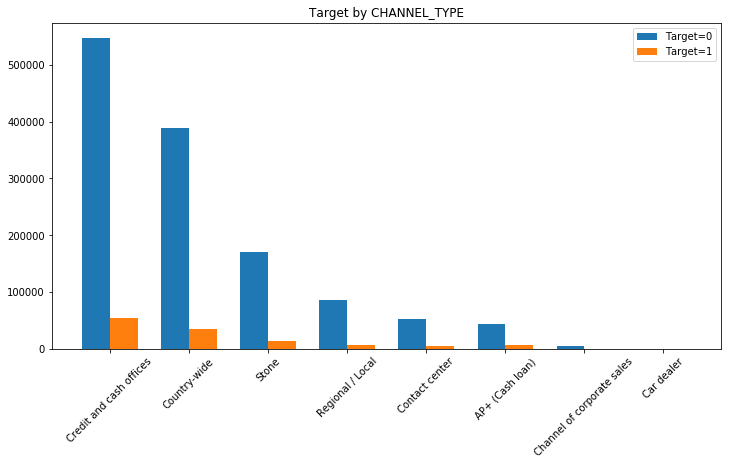

In [36]:
target_bar(prv[['SK_ID_CURR', 'CHANNEL_TYPE', 'TARGET']], "CHANNEL_TYPE", "Target by CHANNEL_TYPE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="sellerplace-area"></a>
## SELLERPLACE_AREA 

decription : Selling area of seller place of the previous application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


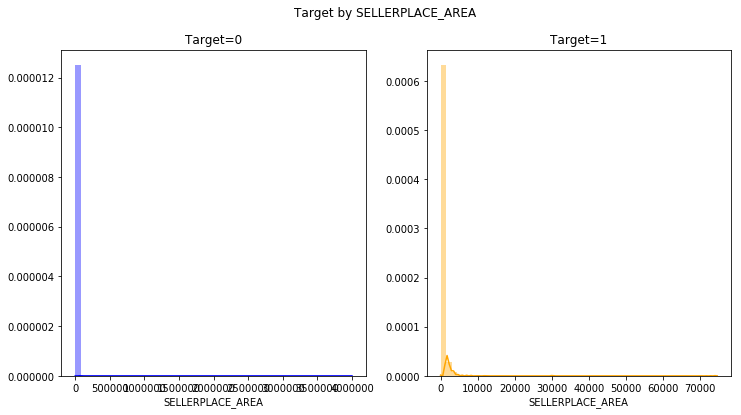

In [37]:
target_hist(prv[['SK_ID_CURR', 'SELLERPLACE_AREA', 'TARGET']], "SELLERPLACE_AREA", "Target by SELLERPLACE_AREA")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-seller-industry"></a>
## NAME_SELLER_INDUSTRY 

decription : The industry of the seller,

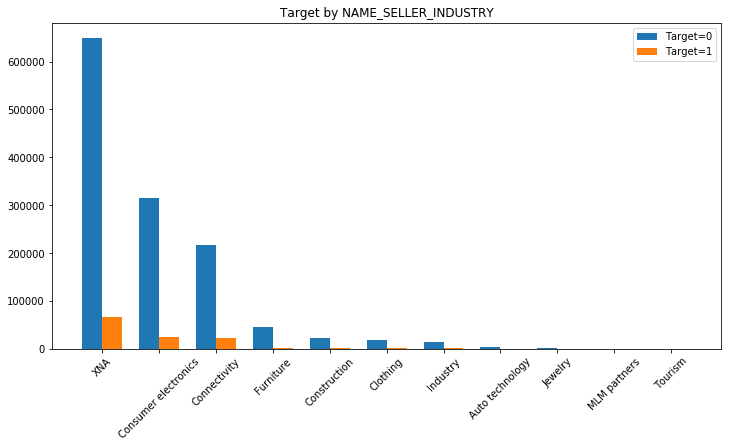

In [38]:
target_bar(prv[['SK_ID_CURR', 'NAME_SELLER_INDUSTRY', 'TARGET']], "NAME_SELLER_INDUSTRY", "Target by NAME_SELLER_INDUSTRY")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="cnt-payment"></a>
## CNT_PAYMENT 

decription : Term of previous credit at application of the previous application,

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


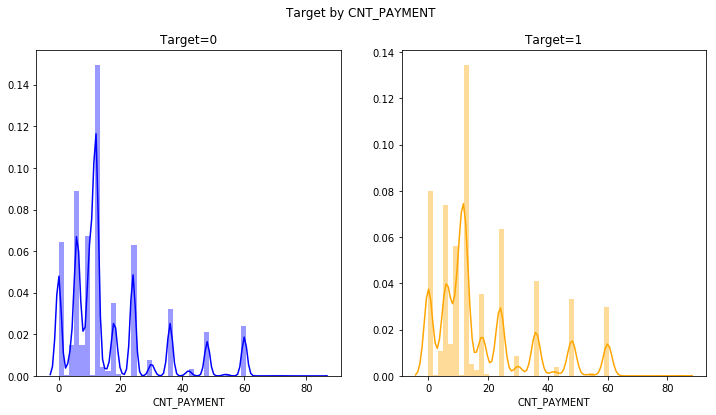

In [39]:
target_hist(prv[['SK_ID_CURR', 'CNT_PAYMENT', 'TARGET']], "CNT_PAYMENT", "Target by CNT_PAYMENT")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="name-yield-group"></a>
## NAME_YIELD_GROUP 

decription : Grouped interest rate into small medium and high of the previous application,grouped

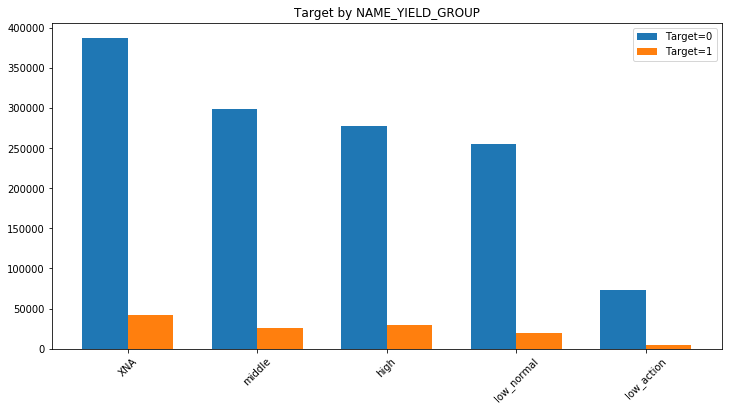

In [40]:
target_bar(prv[['SK_ID_CURR', 'NAME_YIELD_GROUP', 'TARGET']], "NAME_YIELD_GROUP", "Target by NAME_YIELD_GROUP")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="product-combination"></a>
## PRODUCT_COMBINATION 

decription : Detailed product combination of the previous application,

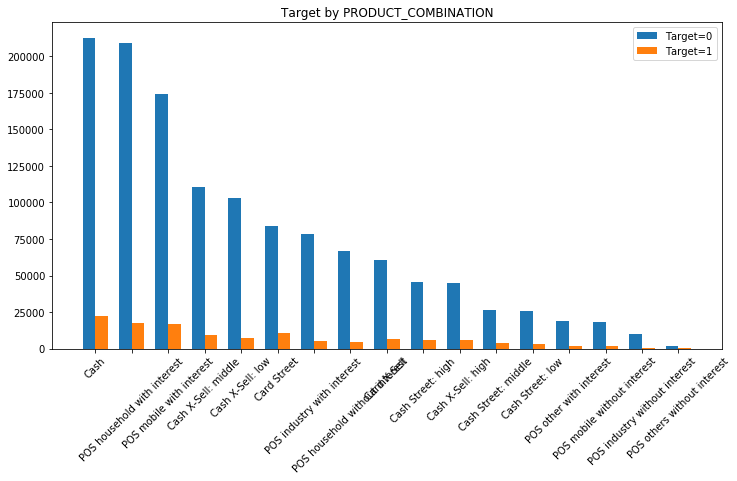

In [41]:
target_bar(prv[['SK_ID_CURR', 'PRODUCT_COMBINATION', 'TARGET']], "PRODUCT_COMBINATION", "Target by PRODUCT_COMBINATION")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-first-drawing"></a>
## DAYS_FIRST_DRAWING 

decription : Relative to application date of current application when was the first disbursement of the previous application,time only relative to the application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


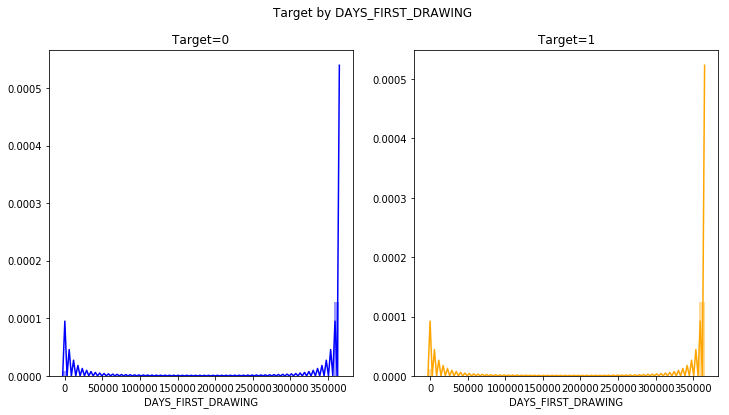

In [42]:
target_hist(prv[['SK_ID_CURR', 'DAYS_FIRST_DRAWING', 'TARGET']], "DAYS_FIRST_DRAWING", "Target by DAYS_FIRST_DRAWING")

DAYS_*のnanはnanの代わりに365243が入っているっぽい

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


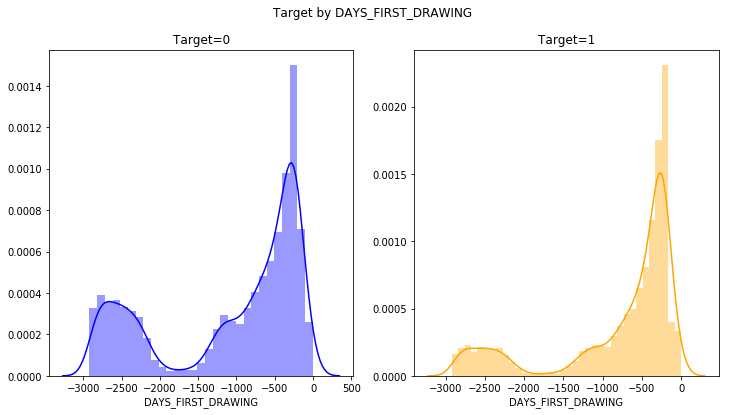

In [43]:
prv['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
target_hist(prv[['SK_ID_CURR', 'DAYS_FIRST_DRAWING', 'TARGET']], "DAYS_FIRST_DRAWING", "Target by DAYS_FIRST_DRAWING")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-first-due"></a>
## DAYS_FIRST_DUE  

decription : Relative to application date of current application when was the first due supposed to be of the previous application,time only relative to the application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


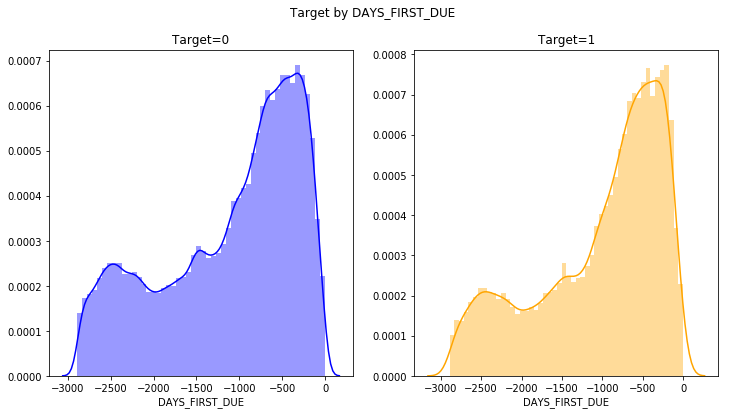

In [44]:
prv['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
target_hist(prv[['SK_ID_CURR', 'DAYS_FIRST_DUE', 'TARGET']], "DAYS_FIRST_DUE", "Target by DAYS_FIRST_DUE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-last-due-1st-version"></a>
## DAYS_LAST_DUE_1ST_VERSION  

decription : Relative to application date of current application when was the first due of the previous application,time only relative to the application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


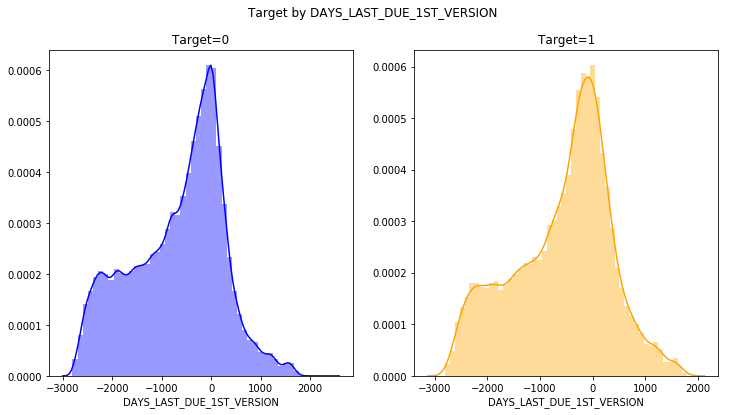

In [45]:
prv['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
target_hist(prv[['SK_ID_CURR', 'DAYS_LAST_DUE_1ST_VERSION', 'TARGET']], "DAYS_LAST_DUE_1ST_VERSION", "Target by DAYS_LAST_DUE_1ST_VERSION")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-last-due"></a>
## DAYS_LAST_DUE  

decription : Relative to application date of current application when was the last due date of the previous application,time only relative to the application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


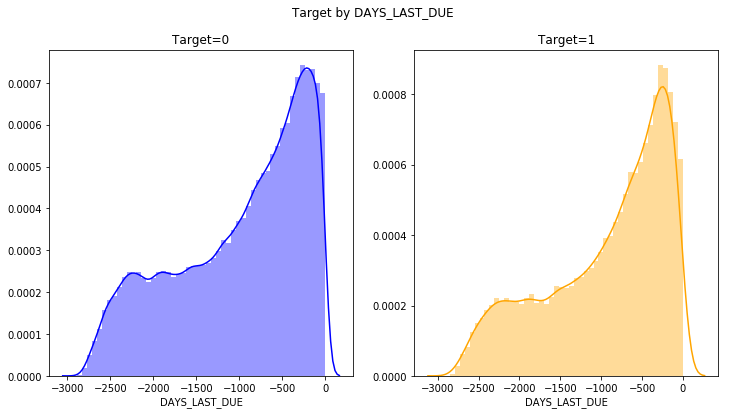

In [46]:
prv['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
target_hist(prv[['SK_ID_CURR', 'DAYS_LAST_DUE', 'TARGET']], "DAYS_LAST_DUE", "Target by DAYS_LAST_DUE")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="days-termination"></a>
## DAYS_TERMINATION  

decription : Relative to application date of current application when was the expected termination of the previous application,time only relative to the application

C:\Users\km65673\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


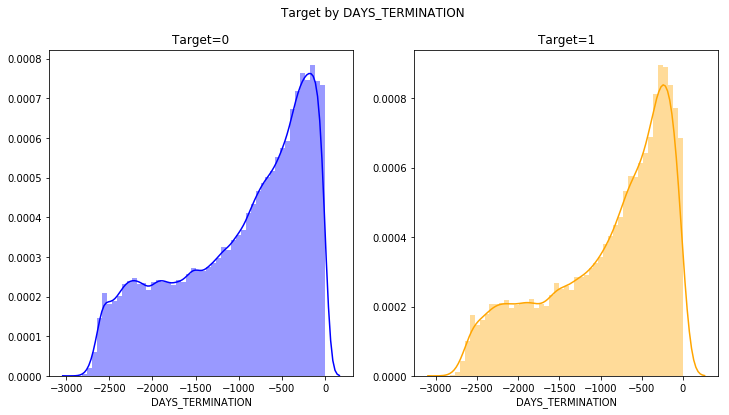

In [47]:
prv['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)
target_hist(prv[['SK_ID_CURR', 'DAYS_TERMINATION', 'TARGET']], "DAYS_TERMINATION", "Target by DAYS_TERMINATION")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="nflag-insured-on-approval"></a>
## NFLAG_INSURED_ON_APPROVAL  

decription : Did the client requested insurance during the previous application,

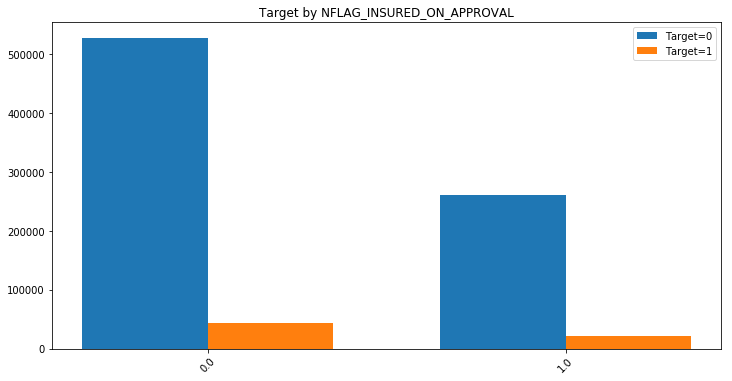

In [48]:
target_bar(prv[['SK_ID_CURR', 'NFLAG_INSURED_ON_APPROVAL', 'TARGET']], "NFLAG_INSURED_ON_APPROVAL", "Target by NFLAG_INSURED_ON_APPROVAL")

<div style="text-align: right;">
[back to top](#top)
</div>